# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Basic Information

In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Data Cleaning 

In [5]:
# Checking missing values
print(df.isnull().sum())    

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# Removing duplicates
df.drop_duplicates(inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Rmoving unnecessary columns
df.drop(columns='oldpeak', inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,3,2,0


In [8]:
# Ranaming columns for better understanding
df.rename( columns={'chol' : 'cholesterol','sex' : 'Gender'}, inplace=True)
df.head()

,age,Gender,cp,trestbps,cholesterol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,3,2,0


In [9]:
# # Converting from Gender column 0, 1 to Male, Female
# df['Gender'] = np.where(df['Gender'] == 1, 'Male', 'Female')
# df.head()

In [10]:
# Changing data types
df['cholesterol'] = df['cholesterol'].astype('float')
df['cholesterol'].dtype

dtype('float64')

In [11]:
# Changing data types
df['cholesterol'] = df['cholesterol'].astype('int')
df['cholesterol'].dtype

dtype('int64')

In [12]:
# Checking Unique values in thalach
len(df['thalach'].unique())

91

## Columns

In [13]:
# Print all Columns Name
for i in df.columns :
    print(i)

age
Gender
cp
trestbps
cholesterol
fbs
restecg
thalach
exang
slope
ca
thal
target


# Description of the Data

In [14]:
# Describe the Data
df.describe()

,age,Gender,cp,trestbps,cholesterol,fbs,restecg,thalach,exang,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

## Age distribution of patients

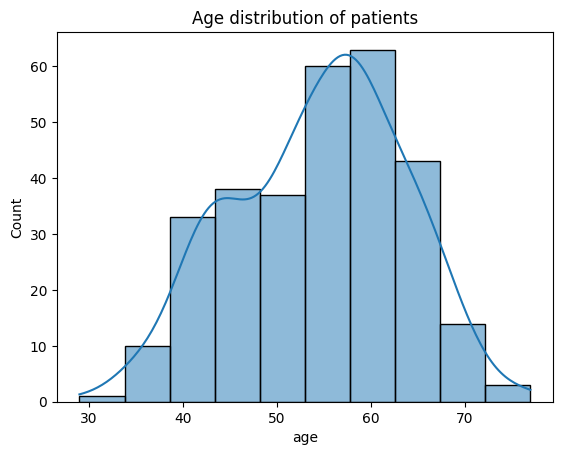

In [15]:
# Plotting the distribution of Age

sns.histplot(df["age"],bins=10,kde=True)
plt.title("Age distribution of patients")
plt.show()

From above graph we see that the number of distribution of patients is higher in the age group of 50-60 year

## Heart Disease Count

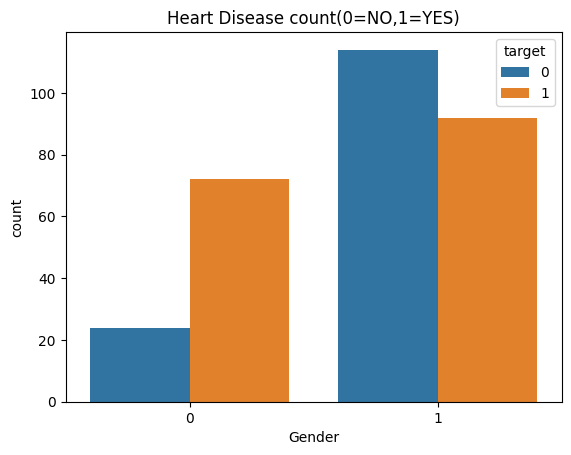

In [16]:
# plotting Heart Disease Count

sns.countplot(x='Gender',hue='target',data=df)
plt.title("Heart Disease count(0=NO,1=YES)")
plt.show()

From above graph we see that the count of heart disease in male is less than from non heart disease but in female is higher than non heart disease

## Age

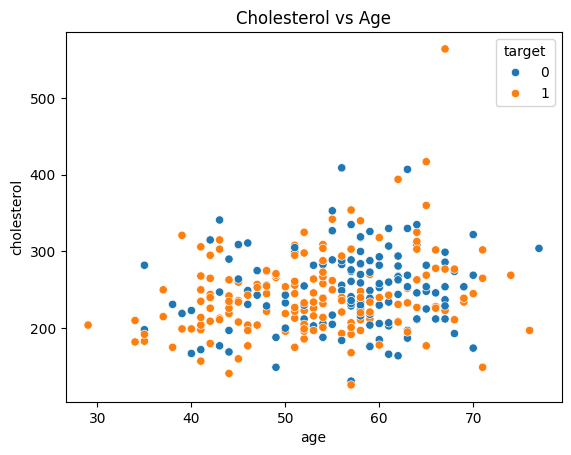

In [17]:
sns.scatterplot(x='age', y='cholesterol', hue='target', data=df)
plt.title("Cholesterol vs Age")
plt.show()

From above graph we see that cholesterol level is higher in between 50-60 age group year

## Correlation

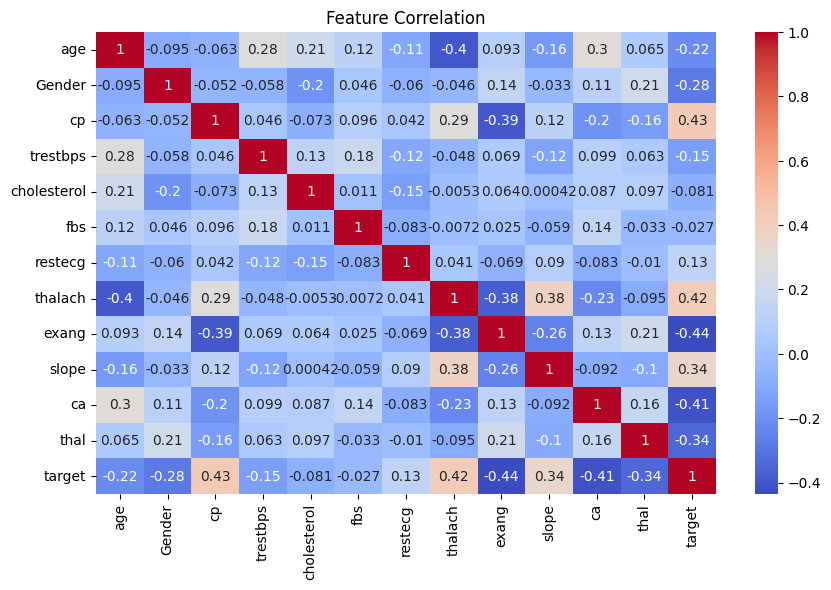

In [18]:
# Correlation heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

From above graph we see that target column has correlation with columns cp, thalach, exang and ca

# Conclusion

People of age gruop 50-60 year are patients of heart disease, among which the number of women is more than those who are not heart disease patients and the patients of cholesterol are higher in the age group of 40-50 year.